### INTRODUCTION

In this notebook we will code the results from **Introduction to Machine Learning: Module III**, chapter 5.

We will be creating and implementing a neural network for classification of the MNIST dataset. The MNIST dataset is a set of handwritten digits, from 0 to 9. The goal is to teach a neural network to be able to recognize the numbers.

**Libraries used:**

To run this notebook, make sure that your Python environment (whether it is from conda or venv) contains:

- NumPy
- Scikit-learn
- Pandas
- matplotlib
- seaborn
- PyTorch

**Learning strategy:**

Create your own notebook to follow along, and redo the analysis done here. Mess around with changing parameters such as the number of neurons in the hidden layers, the number of layers, the activation funtions, the optimization algorithm, and the loss function.

First, as usual we will import the required libraries.

In [1]:
# IMPORTS

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

Next, we will load the MNIST dataset from torchvision.datasets. The first time you run it, download will be set to **True**, after that you can set it to **False** as it will already be downloaded.

In [2]:
# LOAD DATA

# load and preprocess MNIST DATASET
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,)) # normalize between [-1,1]
])

train_dataset = torchvision.datasets.MNIST(root='./data',train = True,download=True,transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data',train = False,download=True,transform=transform)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

# print(train_loader)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 20.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 628kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.68MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.70MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Now to define our neural network! This is done by creating a class which inherits from nn.Module of torch.nn (nn being neural network).  The most important thing here is that your in_features is 28*28 (one for each pixel of the image) and that your out_features is 10 (there are 10 distinct numbers in the dataset). Notice how this class contains the init method, and the forward method.

You are encouraged to edit the neural network. You can do things like editing the number of neurons between each fully connected layer, or changing which activation function is used in the forward method.

Read more about the available activation functions in PyTorch here:
https://pytorch.org/docs/main/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [4]:
# DEFINE NN

class SimpleNN(nn.Module):
    def __init__(self,
                 in_features = 28*28,
                 h1 = 128,
                 h2 = 64,
                 out_features = 10):
        super(SimpleNN,self).__init__()
        self.fc1 = nn.Linear(in_features,h1) # input layer
        self.fc2 = nn.Linear(h1,h2) # hidden layer
        self.fc3 = nn.Linear(h2,out_features) # output layer

    def forward(self,x):
        x = x.view(-1,28*28) # flatten image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) # no activation for final layer
        return(x)

Now to train our neural network. We will define functions for training the model, and evaluating the model.

Training the model involves the forward pass, and backpropagation including parameter optimization, over a number of epochs.

In [5]:
# TRAIN NETWORK

# define training the network
def train_model(model,
                train_loader,
                criterion,
                optimizer,
                epochs = 5):

    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images,labels in train_loader:
            optimizer.zero_grad() # zero the param gradients

            # forward pass
            outputs = model(images)
            loss = criterion(outputs,labels)

            # backward pass and optimizion
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

    print(f'epoch {epoch + 1}/{epochs}, loss: {running_loss/len(train_loader)}')

# define network evaluation and calculate predictions
def evaluate_model(model,test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images,labels in test_loader:
            outputs = model(images)
            _,preds = torch.max(outputs,1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

    return(np.array(all_labels), np.array(all_preds))

With our libraries imported, dataset loaded, neural network defined, and training processes defined, we are now ready to implement the neural network.

Read about the PyTorch loss functions here:
https://pytorch.org/docs/main/nn.html#loss-functions

Read about the PyTorch optimizers here:
https://pytorch.org/docs/stable/optim.html

epoch 5/5, loss: 0.0928806446692241


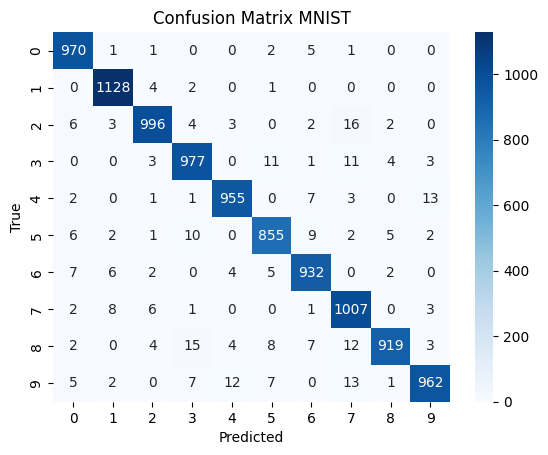

In [6]:
# MAIN

# define loss function and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# train model
train_model(model,train_loader,criterion,optimizer,epochs = 5)

# evaluate model
labels,preds = evaluate_model(model,test_loader)

# plot confusion matrix
cm = confusion_matrix(labels,preds)
plt.figure()
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels=[i for i in range(10)], yticklabels=[i for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix MNIST')
plt.show()

# END

The confusion matrix gives us a good idea of how well the model will perform on new, unseen data. Ideally, the diagonal elements will have the largest values. If there is a heavy skew to the upper triangular or lower triangular side of the matrix, that could indicate a systematic error in the model and you should evaluate the components.